# Final Project

Fajri Sofianto

Data : Titanic https://www.kaggle.com/competitions/titanic/data

Membuat Machine Learning untuk tugas akhir pelatihan Python for Data Science

Model yang digunakan KNN dengan Hyperparameter Tuning

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pydotplus
import graphviz

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import export_graphviz
from IPython.display import Image  
from six import StringIO

In [17]:
#df_train = pd.read_csv('/Users/fajrisofianto/Downloads/titanic/train.csv') #import data training
#df_test_fitur = pd.read_csv('/Users/fajrisofianto/Downloads/titanic/test.csv') #import data testing
#df_test_target = pd.read_csv('/Users/fajrisofianto/Downloads/titanic/gender_submission.csv') #import data target

df_train = pd.read_csv('D:/File_Analisa_Python/train.csv') #import data training
df_test_fitur = pd.read_csv('D:/File_Analisa_Python/test.csv') #import data testing
df_test_target = pd.read_csv('D:/File_Analisa_Python/gender_submission.csv') #import data target

display(df_train.info())
display(df_test_fitur.info())
display(df_test_target.info())

def visualCM(x, y, total_label=2, title=""):
  cm = confusion_matrix(x, y)
  fig, ax = plt.subplots(figsize=(total_label, total_label))
  ax.imshow(cm)
  ax.grid(False)
  ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
  ticks = range(0, total_label)
  ax.xaxis.set(ticks=ticks, ticklabels=ticks)
  ax.yaxis.set(ticks=ticks, ticklabels=ticks)
  ax.set_ylim(total_label-0.5, -0.5)
  for i in range(total_label):
      for j in range(total_label):
          ax.text(j, i, cm[i, j], ha='center', va='center', color='black')
  plt.title(title)
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


None

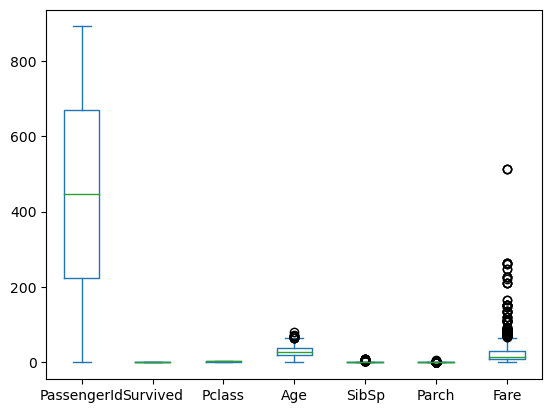

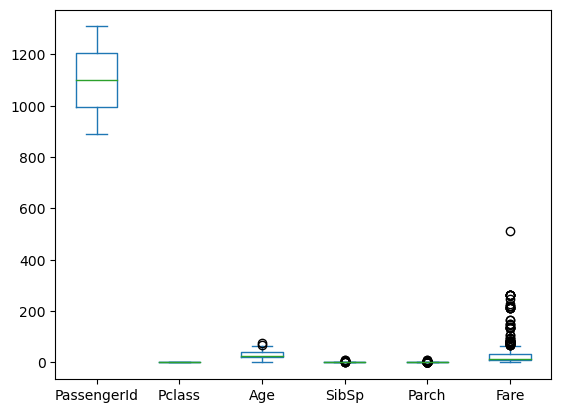

Disini PassengerId terlihat tidak berhubungan antara data training dan testing, sehingga tidak akan digunakan


In [18]:
df_train.plot(kind='box')
df_test_fitur.plot(kind='box')
plt.show()
print('Disini PassengerId terlihat tidak berhubungan antara data training dan testing, sehingga tidak akan digunakan')

# Cleaning data testing Fitur

In [19]:
df_test_fitur.isnull().sum()
df_test_fitur['Age'] = df_test_fitur['Age'].fillna(0)
df_test_fitur['Fare'] = df_test_fitur['Fare'].fillna(0)
df_test_fitur = df_test_fitur[['Pclass','Sex', 'Age', 'SibSp','Parch','Fare','Embarked']].fillna(0)

df_test_fitur.info()

df_test_target = df_test_target['Survived']
print('Data is Clean')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB
Data is Clean


# Cleaning data training

In [20]:
df_train = df_train[['Pclass','Sex', 'Age', 'SibSp','Parch','Fare','Embarked', 'Survived']]

df_train.isnull().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Survived      0
dtype: int64

In [21]:
df_train['Age'] = df_train['Age'].fillna(0)
df_train = df_train.dropna()

C:\Users\Data Analytic\AppData\Local\Temp\ipykernel_7584\2242659677.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Age'] = df_train['Age'].fillna(0)


In [22]:
train_fitur = df_train[['Pclass','Sex', 'Age', 'SibSp','Parch','Fare','Embarked']]
train_fitur.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    889 non-null    int64  
 1   Sex       889 non-null    object 
 2   Age       889 non-null    float64
 3   SibSp     889 non-null    int64  
 4   Parch     889 non-null    int64  
 5   Fare      889 non-null    float64
 6   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 55.6+ KB


<class 'pandas.core.series.Series'>
Int64Index: 889 entries, 0 to 890
Series name: Survived
Non-Null Count  Dtype
--------------  -----
889 non-null    int64
dtypes: int64(1)
memory usage: 13.9 KB


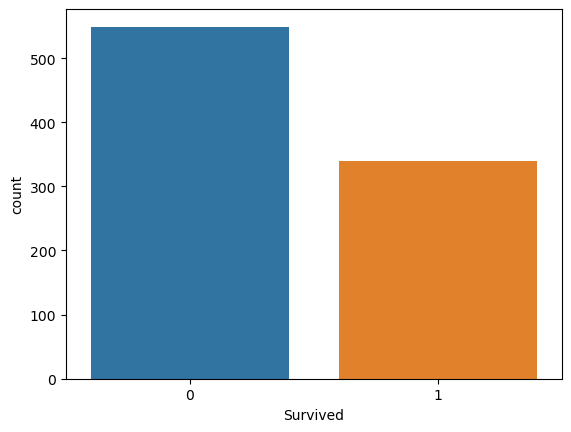

Secara total, lebih banyak yang tidak selamat akibat kecelakaan Kapal Titanic


In [71]:
train_target = df_train['Survived'] #define data training target survived or not
train_target.info()
train_target

sns.countplot(x='Survived', data=df_train)
plt.show()
print('Secara total, lebih banyak yang tidak selamat akibat kecelakaan Kapal Titanic')

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 16.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 6.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 27.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 11.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


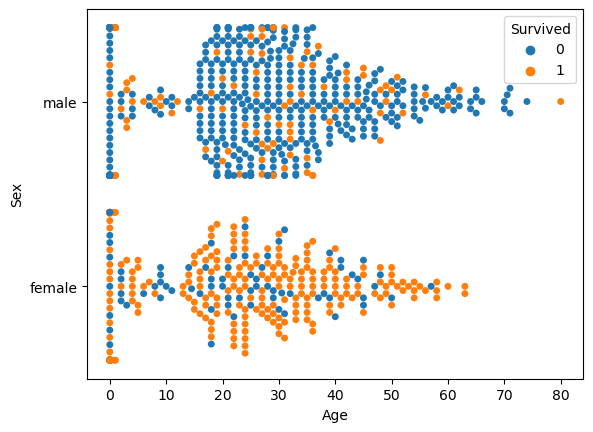

Perempuan lebih banyak yang selamat dibandingkan Laki - laki


In [70]:
sns.swarmplot(x='Age', y='Sex', hue= 'Survived', data=df_train)
plt.show()
print('Perempuan lebih banyak yang selamat dibandingkan Laki - laki')

# Encode data training

In [72]:
train_fitur = train_fitur.copy()

col_to_encode = ['Sex','Embarked']

for c in col_to_encode:
  le = LabelEncoder()
  train_fitur[c] = le.fit_transform(train_fitur[c])
  print(c, le.classes_)

train_fitur


Sex [0 1]
Embarked [0 1 2]


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,2
887,1,0,19.0,0,0,30.0000,2
888,3,0,0.0,1,2,23.4500,2
889,1,1,26.0,0,0,30.0000,0


# Encode data testing

In [73]:
df_test_fitur = df_test_fitur[['Pclass','Sex', 'Age', 'SibSp','Parch','Fare','Embarked']]

test_fitur = df_test_fitur.copy()

col_to_encode = ['Sex','Embarked']

for c in col_to_encode:
  le = LabelEncoder()
  test_fitur[c] = le.fit_transform(test_fitur[c])
  print(c, le.classes_)

test_fitur

Sex ['female' 'male']
Embarked ['C' 'Q' 'S']


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2
...,...,...,...,...,...,...,...
413,3,1,0.0,0,0,8.0500,2
414,1,0,39.0,0,0,108.9000,0
415,3,1,38.5,0,0,7.2500,2
416,3,1,0.0,0,0,8.0500,2


In [74]:
model_RF = RandomForestClassifier(n_estimators=3)

model_RF.fit(train_fitur,train_target)

RandomForestClassifier(n_estimators=3)

In [76]:
y_predRF = model_RF.predict(test_fitur)
print(classification_report(df_test_target, y_predRF))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86       266
           1       0.75      0.74      0.74       152

    accuracy                           0.82       418
   macro avg       0.80      0.80      0.80       418
weighted avg       0.82      0.82      0.82       418



# Tuning Parameter Fitur

In [77]:
train_col = list(train_fitur.columns)
fitur_importance = pd.Series(model_RF.feature_importances_, index=train_col).sort_values(ascending=False)

fitur_importance

Sex         0.260149
Fare        0.259037
Age         0.219744
Pclass      0.109283
Parch       0.058661
SibSp       0.056448
Embarked    0.036677
dtype: float64

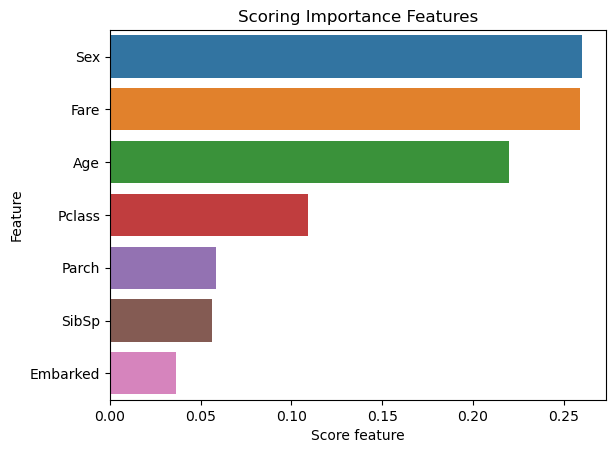

kita coba pakai 3 fitur paling tinggi scorenya


In [78]:
sns.barplot(x=fitur_importance, y=fitur_importance.index)
plt.xlabel('Score feature')
plt.ylabel('Feature')
plt.title('Scoring Importance Features')
plt.show()
print('''kita coba pakai 3 fitur paling tinggi scorenya''')

In [79]:
train_fitur2 = train_fitur[['Fare','Age','Sex']]

test_fitur2 = test_fitur[['Fare','Age','Sex']]

model_RF2 = RandomForestClassifier(n_estimators=3)
model_RF2.fit(train_fitur2, df_train_target)

RandomForestClassifier(n_estimators=3)

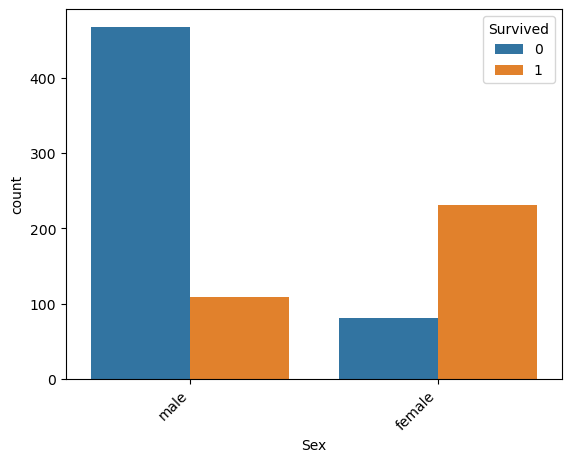

In [80]:
sns.countplot(data=df_train,x='Sex',hue='Survived')
plt.xticks(rotation=45, ha='right');